# Recitation 1
Reading files, Splitting strings, List comprehension, Lambda Functions, SKLearn, Analyzing results

We want to be able to parse this text file into a dataset:

 >  This is a happy text,1
    This is a sad text,0
    This too is a happy text,1

The file is saved under "some_text.txt"

## Reading Files

In [1]:
with open("some_text.txt", "r") as f:
    read = f.read()

print("--read--")
print(read)


with open("some_text.txt", "r") as f:
    readline = f.readline()

print("\n--readline--")
print(readline)


with open("some_text.txt", "r") as f:
    readlines = f.readlines()

print("\n--readlines--")
print(readlines)

--read--
This is a happy text,1
This is a sad text,0
This too is a happy text,1

--readline--
This is a happy text,1


--readlines--
['This is a happy text,1\n', 'This is a sad text,0\n', 'This too is a happy text,1']


## List Comprehension

Let's say we have a list of integeres and we want to multiply each element by 2

In [2]:
a = [1, 2, 3, 4, 5, 6]

This won't work:

In [3]:
b = a * 2
print(b)

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]


First way:

In [4]:
b = []
for i in a:
    b.append(i * 2)
print(b)

[2, 4, 6, 8, 10, 12]


This is more elegant and more efficient;

In [5]:
b = [i * 2 for i in a]
print(b)

[2, 4, 6, 8, 10, 12]


### Adding conditions

Now let's say we want to get only the even numbers in the list. First way:

In [6]:
b = []
for i in a:
    if i % 2 ==0:
        b.append(i)
print(b)

[2, 4, 6]


With list comprehension

In [7]:
b = [i for i in a if i % 2 == 0]
print(b)

[2, 4, 6]


### Strip function

In [8]:
s1 = "\nThis is a happy sentence,1\n"
print(f"strip: {repr(s1.strip())}")
print(f"rstrip: {repr(s1.rstrip())}")
print(f"lstrip: {repr(s1.lstrip())}")

s2 = "\tThis is a happy sentence,1\t"
s3 = "    This is a happy sentence,1    "
print(f"strip tabs: {repr(s1.strip())}")
print(f"strip spaces: {repr(s1.strip())}")

strip: 'This is a happy sentence,1'
rstrip: '\nThis is a happy sentence,1'
lstrip: 'This is a happy sentence,1\n'
strip tabs: 'This is a happy sentence,1'
strip spaces: 'This is a happy sentence,1'


### Stripping the \n

In [9]:
with open("some_text.txt", "r") as f:
    readlines = f.readlines()

print("--readlines--")
print(readlines)

--readlines--
['This is a happy text,1\n', 'This is a sad text,0\n', 'This too is a happy text,1']


In [10]:
with open("some_text.txt", "r") as f:
    stripped_realines = [line.strip() for line in f.readlines()]

print("--stripped readlines--")
print(stripped_realines)

--stripped readlines--
['This is a happy text,1', 'This is a sad text,0', 'This too is a happy text,1']


## Splitting to sentences and labels

### Split Method

In [11]:
s = "Oh the humanity"
print(s.split(" "))

['Oh', 'the', 'humanity']


### Splitting up the lines

In [12]:
with open("some_text.txt", "r") as f:
    raw_data = [line.strip() for line in f.readlines()]
    raw_data = [line.split(",") for line in raw_data]
print(raw_data)

[['This is a happy text', '1'], ['This is a sad text', '0'], ['This too is a happy text', '1']]


### Separating sentences and labels

In [13]:
with open("some_text.txt", "r") as f:
    raw_data = [line.strip() for line in f.readlines()]
    raw_data = [line.split(",") for line in raw_data]
    sentences = [line[0] for line in raw_data]
    labels = [line[1] for line in raw_data]
print(f"sentences: {sentences}")
print(f"labels: {labels}")

sentences: ['This is a happy text', 'This is a sad text', 'This too is a happy text']
labels: ['1', '0', '1']


## Creating Features

### Lambda Functions
Let's say we want one functions that multiplies numbers by 2 and another by 3

In [14]:
def times_2(n):
    return 2 * n

def times_3(n):
    return 3 * n

print(f"2 * 4 = {times_2(4)}")
print(f"3 * 4 = {times_3(4)}")

2 * 4 = 8
3 * 4 = 12


We can also achieve this by using lambda functions

In [15]:
times_2 = lambda n: 2 * n
times_3 = lambda n: 3 * n

print(f"2 * 4 = {times_2(4)}")
print(f"3 * 4 = {times_3(4)}")

2 * 4 = 8
3 * 4 = 12


Now we can use this to create a function that generates mulitplication functions

In [16]:
def times_k(k):
    return lambda n: k * n

times_2 = times_k(2)
times_3 = times_k(3)

print(f"2 * 4 = {times_2(4)}")
print(f"3 * 4 = {times_3(4)}")

2 * 4 = 8
3 * 4 = 12


### Creating Features
We'll want our features to be lambda functions that get a sentence as an input and return some value

In [17]:
feature_happy = lambda sentence: "happy" in sentence
feature_sad = lambda sentence: "sad" in sentence

for sentence in sentences:
    print(sentence)
    print(f"Happy: {feature_happy(sentence)}")
    print(f"Sad: {feature_sad(sentence)}\n")

This is a happy text
Happy: True
Sad: False

This is a sad text
Happy: False
Sad: True

This too is a happy text
Happy: True
Sad: False



## Short SKLearn Recap

In [49]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [33]:
dataset = load_iris()
X, y = dataset['data'], dataset['target']

In [34]:
print(X.shape)
print(X)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [35]:
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

score = model.score(X, y)
print("--score--")
print(score)

predict = model.predict(X)
print("\n--predict--")
print(predict)

predict_proba = model.predict_proba(X)
print("\n--predict_proba--")
print(predict_proba)

--score--
0.9733333333333334

--predict--
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

--predict_proba--
[[9.81589449e-01 1.84105370e-02 1.44719389e-08]
 [9.71352524e-01 2.86474459e-02 3.01330892e-08]
 [9.85281611e-01 1.47183770e-02 1.23159831e-08]
 [9.76078494e-01 2.39214663e-02 3.96336854e-08]
 [9.85238361e-01 1.47616273e-02 1.19827281e-08]
 [9.70221224e-01 2.97787023e-02 7.38744309e-08]
 [9.86777099e-01 1.32228809e-02 1.99513458e-08]
 [9.76158223e-01 2.38417491e-02 2.76818356e-08]
 [9.79640527e-01 2.03594427e-02 3.05507991e-08]
 [9.68787507e-01 3.12124611e-02 3.16655983e-08]
 [9.76237690e-01 2.37622910e-02 1.93341549e-08]
 [9.75222357e-01 2.47775987e-02 4.38807151e-08]
 [9.74248268e-01 2.57517105e-02 2.14743625e-08]
 [9.91877

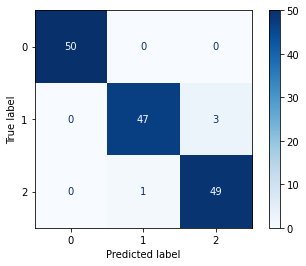

In [50]:
plot_confusion_matrix(model, X, y, cmap=plt.cm.Blues)